In [14]:
# Preprocess imports

import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# ML imports

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihsiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ihsiu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# TASK 1

In [15]:
class preprocessing:
    
    def file_import(file):
        df = pd.read_csv(file)
        return df
    
    def clean_reviews(file):
        
        df = preprocessing.file_import(file)
        
        #clean punctuation and make all words lower case
        df['clean_review'] = df['Review'].str.replace(r'\W', ' ', regex=True).str.lower()
        #clean digits
        df['clean_review'] = df['clean_review'].str.replace(f'[{string.digits}]', '', regex=True)
        # remove any words less than 3
        df['clean_review'] = df['clean_review'].str.findall('\w{3,}').str.join(' ')

        
        return df  
    
    def tokenise(file):
        #tokenise reviews
        df = preprocessing.clean_reviews(file)
        
        #remove stopwords
        stop_words = set(stopwords.words('english'))
        
        df['token_review'] = df['clean_review'].apply(word_tokenize)
        
        df['remove_stopwords_review_tokens'] = df['token_review'].apply(lambda x: [words for words in x if words not in stop_words])        
        return df
            
    def snowball_stemming_replaced_sent(file):
        
        df = preprocessing.tokenise(file)

        stemmer = SnowballStemmer(language='english')

        # stem every tokens
        df['stemmed'] = df['remove_stopwords_review_tokens'].apply(lambda x: [stemmer.stem(words) for words in x])
        df['final_review'] = df['stemmed'].apply((lambda x: ' '.join([word for word in x])))
        
        #Replaced sentiment w/ pos = 1 and neg = 0
        df['Sentiment_replaced'] = df['Sentiment'].replace('Neg', 0).replace('Pos', 1)

        return df
    

file = "car_reviews.csv"
df = preprocessing.snowball_stemming_replaced_sent(file)
df

,Sentiment,Review,clean_review,token_review,remove_stopwords_review_tokens,stemmed,final_review,Sentiment_replaced
0,Neg,In 1992 we bought a new Taurus and we really ...,bought new taurus and really loved decided try...,"[bought, new, taurus, and, really, loved, deci...","[bought, new, taurus, really, loved, decided, ...","[bought, new, taurus, realli, love, decid, tri...",bought new taurus realli love decid tri new ta...,0
1,Neg,The last business trip I drove to San Franci...,the last business trip drove san francisco wen...,"[the, last, business, trip, drove, san, franci...","[last, business, trip, drove, san, francisco, ...","[last, busi, trip, drove, san, francisco, went...",last busi trip drove san francisco went hertz ...,0
2,Neg,My husband and I purchased a 1990 Ford F250 a...,husband and purchased ford and had nothing but...,"[husband, and, purchased, ford, and, had, noth...","[husband, purchased, ford, nothing, problems, ...","[husband, purchas, ford, noth, problem, own, v...",husband purchas ford noth problem own vehicl a...,0
3,Neg,I feel I have a thorough opinion of this truc...,feel have thorough opinion this truck compared...,"[feel, have, thorough, opinion, this, truck, c...","[feel, thorough, opinion, truck, compared, pos...","[feel, thorough, opinion, truck, compar, post,...",feel thorough opinion truck compar post evalu ...,0
4,Neg,AS a mother of 3 all of whom are still in ca...,mother all whom are still carseats the only lo...,"[mother, all, whom, are, still, carseats, the,...","[mother, still, carseats, logical, thing, trad...","[mother, still, carseat, logic, thing, trade, ...",mother still carseat logic thing trade minivan...,0
...,...,...,...,...,...,...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...,june bought the sony limited edition focus sed...,"[june, bought, the, sony, limited, edition, fo...","[june, bought, sony, limited, edition, focus, ...","[june, bought, soni, limit, edit, focus, sedan...",june bought soni limit edit focus sedan simpli...,1
1378,Pos,After 140 000 miles we decided to replace my...,after miles decided replace wife toyota camry ...,"[after, miles, decided, replace, wife, toyota,...","[miles, decided, replace, wife, toyota, camry,...","[mile, decid, replac, wife, toyota, camri, fou...",mile decid replac wife toyota camri found new ...,1
1379,Pos,The Ford Focus is a great little record setti...,the ford focus great little record setting car...,"[the, ford, focus, great, little, record, sett...","[ford, focus, great, little, record, setting, ...","[ford, focus, great, littl, record, set, car, ...",ford focus great littl record set car first ca...,1
1380,Pos,I needed a new car because my hyundai excel 9...,needed new car because hyundai excel had decid...,"[needed, new, car, because, hyundai, excel, ha...","[needed, new, car, hyundai, excel, decided, sh...","[need, new, car, hyundai, excel, decid, shop, ...",need new car hyundai excel decid shop around n...,1


In [16]:
# Set X as review parameters and y variables
X = df['final_review']
y = df['Sentiment_replaced']

# Split trainning and testing... note: delete rand_state after testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print('Top 5 Reviews processed:\n')
print(X.head())

print('Top 5 sentiment processed:\n')
print(y.head())

print('sentiment 1000 to 1005 processed:\n')
print(y[1000:1005])
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

print('Review unprocessed:\n')
print(f"{df['Review'][0:5]}\n")

print('Remove punctuation, digits, short words and make lowercase:\n')
print(f"{df['clean_review'][0:5]}\n")

print('Tokenized words:\n')
print(f"{df['token_review'][0:5]}\n")

print('Stopwords removed:\n')
print(f"{df['remove_stopwords_review_tokens'][0:5]}\n")

print('Stemmed words:\n')
print(f"{df['stemmed'][0:5]}\n")

print('Review fully processed:\n')
print(f"{df['final_review'][0:5]}\n")
print("Number of rows in the dataset:", X.shape[0])

Top 5 Reviews processed:

0    bought new taurus realli love decid tri new ta...
1    last busi trip drove san francisco went hertz ...
2    husband purchas ford noth problem own vehicl a...
3    feel thorough opinion truck compar post evalu ...
4    mother still carseat logic thing trade minivan...
Name: final_review, dtype: object
Top 5 sentiment processed:

0    0
1    0
2    0
3    0
4    0
Name: Sentiment_replaced, dtype: int64
sentiment 1000 to 1005 processed:

1000    1
1001    1
1002    1
1003    1
1004    1
Name: Sentiment_replaced, dtype: int64
942     cobra second particular breed own first cobra ...
938     purchas ranger new march purchas need truck us...
1154    recent purchs truck year drive small mid size ...
1064    purchas expedit april quit accid explor order ...
692     bought new ford taurus two month ago love form...
Name: final_review, dtype: object
655    admit much mechan detail technic get basic six...
975    ford made littl buzz fact current ford mustang...
4

In [17]:
# Bag of words count vectorizer preprocessing before classification...

vectorizer = CountVectorizer()
X_train_bag_o_w = vectorizer.fit_transform(X_train, y_train)
X_test_bag_o_w = vectorizer.transform(X_test)

vectorizer.vocabulary_

{'cobra': 1399,
 'second': 6541,
 'particular': 5372,
 'breed': 869,
 'own': 5309,
 'first': 2820,
 'convert': 1610,
 'initi': 3839,
 'reaction': 5997,
 'saw': 6464,
 'reveal': 6249,
 'car': 1070,
 'wow': 8658,
 'statist': 7181,
 'alon': 212,
 'mind': 4704,
 'boggl': 782,
 'horsepow': 3609,
 'underr': 8083,
 'ford': 2930,
 'intent': 3896,
 'realist': 6008,
 'figur': 2786,
 'somewher': 6971,
 'around': 369,
 'rear': 6017,
 'wheel': 8506,
 'flywheel': 2893,
 'foot': 2918,
 'pound': 5658,
 'torqu': 7824,
 'mile': 4691,
 'time': 7746,
 'box': 829,
 'final': 2797,
 'auto': 463,
 'maker': 4495,
 'took': 7802,
 'draw': 2235,
 'board': 772,
 'engin': 2468,
 'room': 6342,
 'basement': 577,
 'enthusiast': 2490,
 'actual': 74,
 'buy': 986,
 'drive': 2250,
 'said': 6421,
 'guy': 3366,
 'next': 4988,
 'begin': 632,
 'know': 4134,
 'get': 3150,
 'frighten': 3025,
 'fast': 2712,
 'deal': 1890,
 'keep': 4076,
 'better': 676,
 'sit': 6787,
 'insid': 3861,
 'notic': 5065,
 'snake': 6903,
 'badg': 531,
 

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       150
           1       0.70      0.81      0.75       127

    accuracy                           0.75       277
   macro avg       0.75      0.76      0.75       277
weighted avg       0.76      0.75      0.75       277

Confusion Matrix:
[[105  45]
 [ 24 103]]

Confusion matrix plot:
accuracy:0.7509025270758123


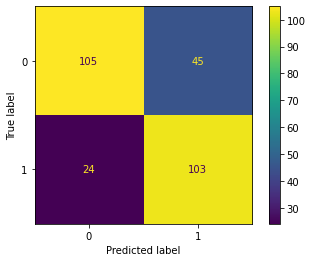

In [21]:
# initiate model and fit vectored x + y training sets
model = MultinomialNB()
model.fit(X_train_bag_o_w, y_train)

# Test the model with the test set
predict = model.predict(X_test_bag_o_w)

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_bag_o_w, y_test)

# from sklearn.metrics import 
print(f'accuracy:{accuracy_score(y_test, predict)}')

# TASK 2

## Improving the vectorizer

There are some methods of improving this model further:

1. The use of GridSearchCV to find optimal hyperparameter for the model
2. Find different kinds of classfication models and pick the best model

## Tuning

There is a need of tuning the hyperparameters on MultinomialNB() to maximize the performance of the models. To do that, I  decided to use GridSearchCV from sklearn to find the best hyperparameter for MultinomialNB() model. The cv parameter in GridSearchCV is set to None, so on default it should do a 5-fold cross validation on the data. Since there is 1 parameter on MultinomialNB, the only parameters that is needed to be inputted is the alpha values, hence:

In [6]:
from sklearn.model_selection import GridSearchCV

alpha_values = [0.0025, 0.05, 1, 5, 10, 20, 40, 80, 160]

model = MultinomialNB()

# search_space: only the hyperparameter
search_space = {
    'alpha': alpha_values
}

# Gridsearch
grid_search = GridSearchCV(model, search_space, scoring='roc_auc', return_train_score=True, verbose=1)

# Fitting the model into gridsearchCV...
grid_search.fit(X_train_bag_o_w, y_train)

print(f"Best cross-validation score: {grid_search.best_score_:.2f}")
print(f"The best alpha value: {grid_search.best_params_['alpha']}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best cross-validation score: 0.84
The best alpha value: 1


From the result given above, it is possible to conclude that the default hyperparameter in the multinomial model is already the optimal solution. However, this solution is the result of both CountVectorizer and the multinomial classification model, and it is not known if changing either of the algotherms would somewhat give a different kind of results. Therefore, there is a need to use a better vectorizer and model.

The problem with CountVectorizer() is that it would count the most repeated words and give that word a higher value than the others, i.e. words that has the highest count dominates. This is creating situations where the classification model misses out a lot of the context and meaning of the words, as the top repeated words may not contain as much information to the model as other words.

To fix this problem, I applied TfidVectorizer(), known as Term Frequency – Inverse Document Frequency. What it does is that not only it gives a scoring on the the times when the same word appears, it also scores rare words across the reviews, making this a conditioned vectorizer.

Therefore, instead of using CountVectorizer, I would change it to TfidVectorizer():


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_tf = df['final_review']

y_tf = df['Sentiment_replaced']
# Break off validation set from training data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.8, test_size=0.2, random_state=0)


tfidf_vectorizer = TfidfVectorizer()
# Prevent data leakage
X_train_tf = tfidf_vectorizer.fit_transform(X_train_tf, y_train_tf)
X_test_tf = tfidf_vectorizer.transform(X_test_tf)

alpha_values = [0.0025, 0.05, 1, 5, 10, 20, 40, 80, 160]

model = MultinomialNB()

# search_space: only the hyperparameter
search_space = {
    'alpha': alpha_values
}

# Gridsearch
grid_search = GridSearchCV(model, search_space, scoring='roc_auc', return_train_score=True, verbose=1)

# Fitting the model into gridsearchCV...
grid_search.fit(X_train_tf, y_train_tf)

print(f"Best cross-validation score: {grid_search.best_score_:.2f}")
print(f"The best alpha value: {grid_search.best_params_['alpha']}")



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best cross-validation score: 0.86
The best alpha value: 0.05


While the cross-validation score only went up 2%, the best alpha value has dropped from 1 to 0.05. Therefore applying the new hyperparameter and re-do the confusion matrix again, it should get:

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       150
           1       0.71      0.87      0.78       127

    accuracy                           0.78       277
   macro avg       0.79      0.79      0.78       277
weighted avg       0.80      0.78      0.78       277

Confusion Matrix:
[[105  45]
 [ 16 111]]

Confusion matrix plot:


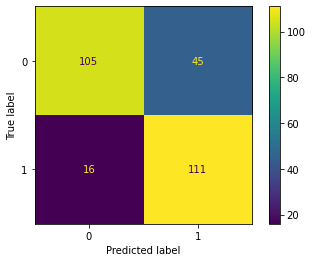

In [8]:
# initiate model and fit vectored x + y training sets
model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
model.fit(X_train_tf, y_train_tf)

# Test the model with the test set
predict = model.predict(X_test_tf)

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test_tf, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test_tf, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_tf, y_test_tf)

By using the TfidVectorizer(), it is possible to see in the classification report that both the precision and the accuracy of the model has slightly increased, but not as significant. I have tried to set ngram_range as bigram (= (2,2)) and trigram (= (3,3)) for the vectorizer, but the results are unsatisfactory and did not improve both the accuracy and the precision at all. 

## Improving the model

For the models, I decided to test these models first and choose the best one out of it. The models that I am going to test on are Complement NB, Gaussian NB and Bernoulli NB. All of these models would be combined with default TfidVectorizer().

### ComplementNB

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.65      0.76       150
           1       0.69      0.91      0.79       127

    accuracy                           0.77       277
   macro avg       0.79      0.78      0.77       277
weighted avg       0.80      0.77      0.77       277

Confusion Matrix:
[[ 98  52]
 [ 11 116]]

Confusion matrix plot:


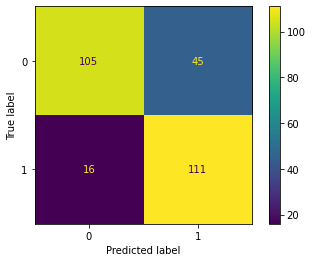

In [9]:
from sklearn.naive_bayes import ComplementNB

X_tf = df['final_review']

y_tf = df['Sentiment_replaced']
# Break off validation set from training data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.8, test_size=0.2, random_state=0)

tfidf_vectorizer = TfidfVectorizer()
# Prevent data leakage
X_train_tf = tfidf_vectorizer.fit_transform(X_train_tf, y_train_tf)
X_test_tf = tfidf_vectorizer.transform(X_test_tf)

CNB = ComplementNB()
CNB.fit(X_train_tf, y_train_tf)

# Test the model with the test set
predict = CNB.predict(X_test_tf)

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test_tf, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test_tf, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_tf, y_test_tf)

### Gaussian NB

Classification report:

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       150
           1       0.49      0.52      0.51       127

    accuracy                           0.53       277
   macro avg       0.53      0.53      0.53       277
weighted avg       0.54      0.53      0.53       277

Confusion Matrix:
[[82 68]
 [61 66]]

Confusion matrix plot:


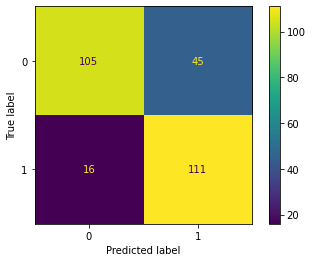

In [10]:
from sklearn.naive_bayes import GaussianNB

X_tf = df['final_review']

y_tf = df['Sentiment_replaced']
# Break off validation set from training data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.8, test_size=0.2, random_state=0)

tfidf_vectorizer = TfidfVectorizer()
# Prevent data leakage
X_train_tf = tfidf_vectorizer.fit_transform(X_train_tf, y_train_tf)
X_test_tf = tfidf_vectorizer.transform(X_test_tf)


GNB = GaussianNB()
GNB.fit(X_train_tf.todense(), y_train_tf)

# Test the model with the test set
predict = GNB.predict(X_test_tf.todense())

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test_tf, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test_tf, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_tf, y_test_tf)

### BernoulliNB

Classification report:

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       150
           1       0.49      0.52      0.51       127

    accuracy                           0.53       277
   macro avg       0.53      0.53      0.53       277
weighted avg       0.54      0.53      0.53       277

Confusion Matrix:
[[82 68]
 [61 66]]

Confusion matrix plot:


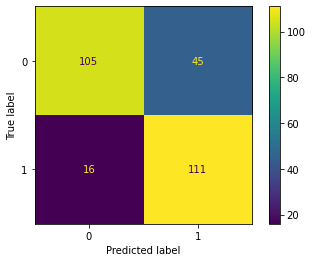

In [11]:
from sklearn.naive_bayes import BernoulliNB


X_tf = df['final_review']

y_tf = df['Sentiment_replaced']
# Break off validation set from training data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.8, test_size=0.2, random_state=0)

tfidf_vectorizer = TfidfVectorizer()
# Prevent data leakage
X_train_tf = tfidf_vectorizer.fit_transform(X_train_tf, y_train_tf)
X_test_tf = tfidf_vectorizer.transform(X_test_tf)

BNB = BernoulliNB()
BNB.fit(X_train_tf.todense(), y_train_tf)

# Test the model with the test set
predict = GNB.predict(X_test_tf.todense())

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test_tf, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test_tf, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_tf, y_test_tf)

From all 3 of the naive_bayes models, it seems like the complementNB maintains a much higher precision and accuracy than the others. Let's try to see if it gives a much better result if I tweak the hyperparameter of the model:



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best cross-validation score: 0.86
The best alpha value: 0.05
Classification report:

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       150
           1       0.72      0.87      0.79       127

    accuracy                           0.78       277
   macro avg       0.79      0.79      0.78       277
weighted avg       0.80      0.78      0.78       277

Confusion Matrix:
[[106  44]
 [ 16 111]]

Confusion matrix plot:


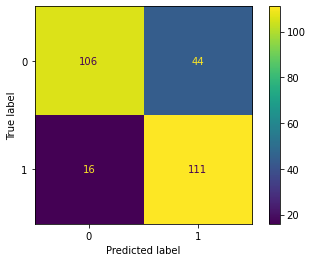

In [12]:
X_tf = df['final_review']

y_tf = df['Sentiment_replaced']
# Break off validation set from training data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, train_size=0.8, test_size=0.2, random_state=0)


tfidf_vectorizer = TfidfVectorizer()
# Prevent data leakage
X_train_tf = tfidf_vectorizer.fit_transform(X_train_tf, y_train_tf)
X_test_tf = tfidf_vectorizer.transform(X_test_tf)

alpha_values = [0.0025, 0.05, 1, 5, 10, 20, 40, 80, 160]

CNB = ComplementNB()

# search_space: only the hyperparameter
search_space = {
    'alpha': alpha_values
}

# Gridsearch
grid_search = GridSearchCV(CNB, search_space, scoring='roc_auc', return_train_score=True, verbose=1)

# Fitting the model into gridsearchCV...
grid_search.fit(X_train_tf, y_train_tf)

print(f"Best cross-validation score: {grid_search.best_score_:.2f}")
print(f"The best alpha value: {grid_search.best_params_['alpha']}")

# initiate model and fit vectored x + y training sets
model = ComplementNB(alpha=grid_search.best_params_['alpha'])
model.fit(X_train_tf, y_train_tf)

# Test the model with the test set
predict = model.predict(X_test_tf)

# Get the classification report
print("Classification report:\n")

report = classification_report(y_test_tf, predict)
print(report)

# Define the confusion matrix
matrix = confusion_matrix(y_test_tf, predict)
print('Confusion Matrix:')
print(f"{matrix}\n")

# plot confusion matrix

print('Confusion matrix plot:')
plot_confusion_matrix(model, X_test_tf, y_test_tf)

Comparing the original results (CountVectorizer & MultiominalNB) with this result (TfidfVectorizer & ComplementNB), it seems like the new results are slightly better than the original. But unfortunately, it does not seem to give a significant improvement to the overall model itself.

# Conclusion

The ideal confusion matrix has a low False Positive,a low False Negative, a high True Positive and a high True Negative. The false positive and the false negative of the new matrix has a value of 44 and 16, whereas the original matrix in task 1 has a value of 45 and 24. The true negative and the true positive of the new matrix has a value of 106 and 111, and the original has 105 and 103. The new combination of vectorizer and model does seem to satisfy this fact, and it performs only slightly higher than the original results in task 1.